
https://nikolasent.github.io/opencv/2017/05/07/Bird's-Eye-View-Transformation.html

위 사이트 이미지 업로드







Mounted at /content/drive


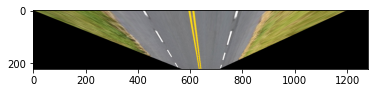

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')


IMAGE_H = 223
IMAGE_W = 1280

src = np.float32([[0, IMAGE_H], [1207, IMAGE_H], [0, 0], [IMAGE_W, 0]])
dst = np.float32([[569, IMAGE_H], [711, IMAGE_H], [0, 0], [IMAGE_W, 0]])
M = cv2.getPerspectiveTransform(src, dst)    # The transformation matrix
Minv = cv2.getPerspectiveTransform(dst, src) # Inverse transformation

# img = cv2.imread('/content/drive/My Drive/test_img.jpg')           # Read the test img
img = cv2.imread('/content/drive/My Drive/photo1.jpg')
img = img[450:(450+IMAGE_H), 0:IMAGE_W]      # Apply np slicing for ROI crop
warped_img = cv2.warpPerspective(img, M, (IMAGE_W, IMAGE_H)) # Image warping
plt.imshow(cv2.cvtColor(warped_img, cv2.COLOR_BGR2RGB))      # Show results
plt.show()

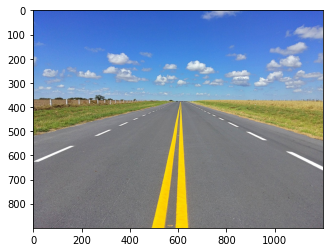

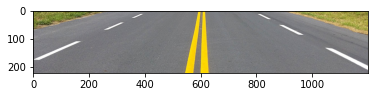

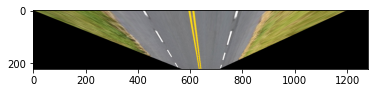

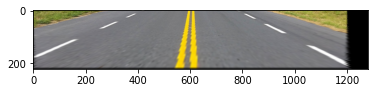

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMAGE_H = 223
IMAGE_W = 1280

src = np.float32([[0, IMAGE_H], [1207, IMAGE_H], [0, 0], [IMAGE_W, 0]])
dst = np.float32([[569, IMAGE_H], [711, IMAGE_H], [0, 0], [IMAGE_W, 0]])
M = cv2.getPerspectiveTransform(src, dst)    # The transformation matrix
Minv = cv2.getPerspectiveTransform(dst, src) # Inverse transformation


# img = cv2.imread('/content/drive/My Drive/test_img.jpg')           # Read the test img
img = cv2.imread('/content/drive/My Drive/photo1.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))      # Show results
plt.show()


img = img[450:(450+IMAGE_H), 0:IMAGE_W]      # Apply np slicing for ROI crop
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))      # Show results
plt.show()

warped_img = cv2.warpPerspective(img, M, (IMAGE_W, IMAGE_H)) # Image warping
plt.imshow(cv2.cvtColor(warped_img, cv2.COLOR_BGR2RGB))      # Show results
plt.show()


img_inv = cv2.warpPerspective(warped_img, Minv, (IMAGE_W, IMAGE_H)) # Inverse transformation
plt.imshow(cv2.cvtColor(img_inv, cv2.COLOR_BGR2RGB))      # Show results
plt.show()


-4.0
5.5
-2.5
0.2


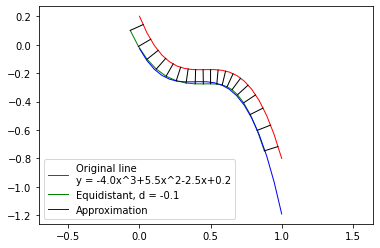

[-4.15206955  4.84732018 -1.85836341 -0.02715   ]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate a polinomial value in a given point x
def pol_calc(pol, x):
    pol_f = np.poly1d(pol)
    return(pol_f(x))

# Create original line text equation for a plot legend
def text_eq(pol):
    str_eq = 'Original line\ny = ' 
    j = 1
    for i,p in enumerate(pol):
        print(p)
        str_eq += str(p)
        order = len(pol)-j
        if order > 1:
            str_eq += ('x^'+str(order))
            if pol[i+1] > 0:
                str_eq += '+'
        elif order > 0:
            str_eq += ('x')
            if pol[i+1] > 0:
                str_eq += '+'
        j += 1
    return str_eq

#Calculate approximated equidistant to a parabola
EQUID_POINTS = 20 # Number of points to use for the equidistant approximation

def equidistant(pol, d, max_l = 1, plot = False):
    x_pol = np.linspace(0, max_l, num=EQUID_POINTS) # Reference curve points
    y_pol = pol_calc(pol, x_pol)
    x_m = [] # Mid points
    y_m = []
    k_m = []
    # Calculate polints position between given points
    for i in range(len(x_pol)-1):
        y_m.append((y_pol[i+1]-y_pol[i])/2.0+y_pol[i])
        x_m.append((x_pol[i+1]-x_pol[i])/2.0+x_pol[i])
        # Slope of perpendicular lines
        if y_pol[i+1] == y_pol[i]: #Avoid division by 0
            k_m.append(1e8) # A vary big number
        else:
            k_m.append(-(x_pol[i+1]-x_pol[i])/(y_pol[i+1]-y_pol[i])) # Slope of a perpendicular
    # Convert arrays into np.arrays
    x_m = np.array(x_m)
    y_m = np.array(y_m)
    k_m = np.array(k_m)
    # Calculate equidistant points
    x_eq = d*np.sqrt(1.0/(1+k_m**2)) # Calculate reference shift dx of the equidistant points
    y_eq = np.zeros_like(x_eq) # Create np.array for y_eq
    if d >= 0: # x positions of the equidistant depends on direction
        for i in range(len(y_m)):
            if k_m[i] < 0: 
                x_eq[i] = x_m[i]-abs(x_eq[i])
            else:
                x_eq[i] = x_m[i]+abs(x_eq[i])
            y_eq[i] = (y_m[i]-k_m[i]*x_m[i])+k_m[i]*x_eq[i]
    else:
        for i in range(len(y_m)):
            if k_m[i] < 0:
                x_eq[i] = x_m[i]+abs(x_eq[i])
            else:
                x_eq[i] = x_m[i]-abs(x_eq[i])
            y_eq[i] = (y_m[i]-k_m[i]*x_m[i])+k_m[i]*x_eq[i]
    # Fit a polinomial of order which is the same to the given one to the equidistant points 
    pol_eq = np.polyfit(x_eq, y_eq, len(pol)-1)
    # Visualize results
    if plot:
        # Original line
        plt.plot(x_pol, y_pol, color='red', linewidth=1, label = text_eq(pol)) 
        # Equidistant
        plt.plot(x_eq, y_eq, color='green', linewidth=1, label = 'Equidistant, d = '+ str(d))
        #Approximation
        plt.plot(x_pol, pol_calc(pol_eq, x_pol), color='blue',
                 linewidth=1, label = 'Approximation') 
        plt.legend() # Add legend
        plt.axis('equal')
        # Draw black connection lines
        for i in range(len(x_m)):
            plt.plot([x_m[i],x_eq[i]], [y_m[i],y_eq[i]], color='black', linewidth=1) 
        plt.show()
        #plt.savefig('./equid.jpg')
    return pol_eq

# Use example
pol = np.array([-4.0, 5.5,  -2.5,  0.2])
print(equidistant(pol, -0.1, plot=True))

In [7]:
import numpy as np
from sklearn.metrics import mean_squared_error

DEV_POL = 2 # Max mean squared error of the approximation
MSE_DEV = 1.1 # Minimum mean squared error ratio to consider higher order of the polynomial
def best_pol_ord(x, y):
    pol1 = np.polyfit(y, x, 1)
    pred1 = pol_calc(pol1, y)
    mse1 = mean_squared_error(x, pred1)
    if mse1 < DEV_POL:
        return pol1, mse1
    pol2 = np.polyfit(y, x, 2)
    pred2 = pol_calc(pol2, y)
    mse2 = mean_squared_error(x, pred2)
    if mse2 < DEV_POL or mse1 / mse2 < MSE_DEV:
            return pol2, mse2
    else:
        pol3 = np.polyfit(y, x, 3)
        pred3 = pol_calc(pol3, y)
        mse3 = mean_squared_error(x, pred3)
        if mse2 / mse3 < MSE_DEV:
            return pol2, mse2
        else:
            return pol3, mse3


https://github.com/NikolasEnt/Advanced-Lane-Lines

https://github.com/NikolasEnt/Vehicle-Detection-and-Tracking

https://github.com/gramman75/opencv/blob/master/doc/10.imageTransformation/imageTransformation.rst

이미지 위치
https://github.com/gramman75/opencv/blob/master/study/images/perspective.jpg

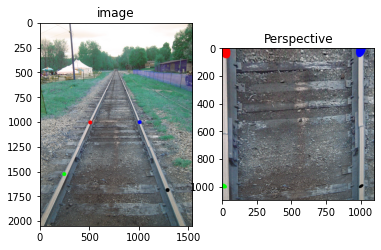

In [13]:
#-*- coding:utf-8 -*-
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/content/drive/My Drive/perspective.jpg')

# [x,y] 좌표점을 4x2의 행렬로 작성
# 좌표점은 좌상->좌하->우상->우하
pts1 = np.float32([[504,1003],[243,1525],[1000,1000],[1280,1685]])

# 좌표의 이동점
pts2 = np.float32([[10,10],[10,1000],[1000,10],[1000,1000]])

# pts1의 좌표에 표시. perspective 변환 후 이동 점 확인.
cv2.circle(img, (504,1003), 20, (255,0,0),-1)
cv2.circle(img, (243,1524), 20, (0,255,0),-1)
cv2.circle(img, (1000,1000), 20, (0,0,255),-1)
cv2.circle(img, (1280,1685), 20, (0,0,0),-1)
M = cv2.getPerspectiveTransform(pts1, pts2)

dst = cv2.warpPerspective(img, M, (1100,1100))

plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Perspective')
plt.show()

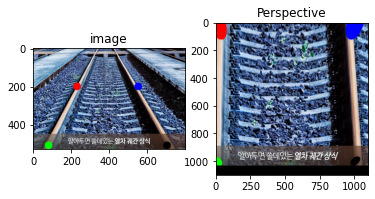

In [25]:
#-*- coding:utf-8 -*-
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/content/drive/My Drive/lane1.jpg')

# [x,y] 좌표점을 4x2의 행렬로 작성
# 좌표점은 좌상->좌하->우상->우하
pts1 = np.float32([[230,200],[81,508],[550,200],[700,508]])

# 좌표의 이동점
pts2 = np.float32([[10,10],[10,1000],[1000,10],[1000,1000]])

# pts1의 좌표에 표시. perspective 변환 후 이동 점 확인.
cv2.circle(img, (230,200), 20, (255,0,0),-1)
cv2.circle(img, (81,508), 20, (0,255,0),-1)
cv2.circle(img, (550,200), 20, (0,0,255),-1)
cv2.circle(img, (700,508), 20, (0,0,0),-1)
M = cv2.getPerspectiveTransform(pts1, pts2)

dst = cv2.warpPerspective(img, M, (1100,1100))

plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Perspective')
plt.show()